In [1]:
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt 
import sklearn.metrics
import pandas as pd
import numpy as np


In [70]:
np_pretrained_filename = '/home/gayane/BartLM/np_BBBP_pretrainedTrue.npy'
np_filename = '/home/gayane/BartLM/fairseq/scripts/np_BBBP_preFalse.npy'
df_filename = '/home/gayane/BartLM/fairseq/scripts/df_BBBP_preFalse.csv'

In [33]:
np_pretrained_filename = '/home/gayane/BartLM/np_BBBP_pretrainedTrue.npy'
df_filename = '/home/gayane/BartLM/df_BBBP_preFalse.csv'

In [71]:
X = np.load(np_pretrained_filename)
df = pd.read_csv(df_filename)

In [72]:
df

,Unnamed: 0,level_0,level_1,SMILES,target,y_pred,MurckoScaffold
0,0,train,0,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,1,0.000255,c1ccccc1
1,1,train,1,C[C@H](N)Cc1ccccc1,1,0.000176,c1ccccc1
2,2,train,2,C[S](=O)(=O)c1ccc(cc1)[C@@H](O)[C@@H](CO)NC(=O...,1,0.980303,c1ccccc1
3,3,train,3,CC(N)COc1c(C)cccc1C,1,0.000320,c1ccccc1
4,4,train,4,c1(ccccc1)CC,1,0.000204,c1ccccc1
...,...,...,...,...,...,...,...
2034,2034,test,199,Nc1nnc(c(N)n1)c2cccc(Cl)c2Cl,1,0.996677,c1ccc(-c2cncnn2)cc1
2035,2035,test,200,COc1ccc(Cl)cc1C(=O)NCCc2ccc(cc2)[S](=O)(=O)NC(...,1,0.881785,O=C(NC1CCCCC1)NS(=O)(=O)c1ccc(CCNC(=O)c2ccccc2...
2036,2036,test,201,Cn1c2CCC(Cn3ccnc3C)C(=O)c2c4ccccc14,1,0.464104,O=C1c2c([nH]c3ccccc23)CCC1Cn1ccnc1
2037,2037,test,202,CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@...,1,0.997009,O=C1CC2CC3Cc4ccccc4C=C3C(=O)C2C(=O)C1=CNCN1CCCC1


In [73]:
X_pairwise = sklearn.metrics.pairwise_distances(X)

In [74]:
X_pairwise.shape

(2039, 2039)

In [75]:
neg_mask = df.target == 0

In [76]:
train_cnt = sum(df.level_0 == 'train')
valid_cnt = sum(df.level_0 == 'valid')
cnt = len(df)


train_cnt_pos = sum(df[~neg_mask].level_0 == 'train')
valid_cnt_pos = sum(df[~neg_mask].level_0 == 'valid')
cnt_pos = len(df[~neg_mask])

train_cnt_neg = sum(df[neg_mask].level_0 == 'train')
valid_cnt_neg = sum(df[neg_mask].level_0 == 'valid')
cnt_neg = len(df[neg_mask])

In [77]:
train_cnt, valid_cnt, cnt

(1631, 204, 2039)

In [78]:
(train_cnt_pos, valid_cnt_pos, cnt_pos), (train_cnt_neg, valid_cnt_neg, cnt_neg)

((1341, 112, 1560), (290, 92, 479))

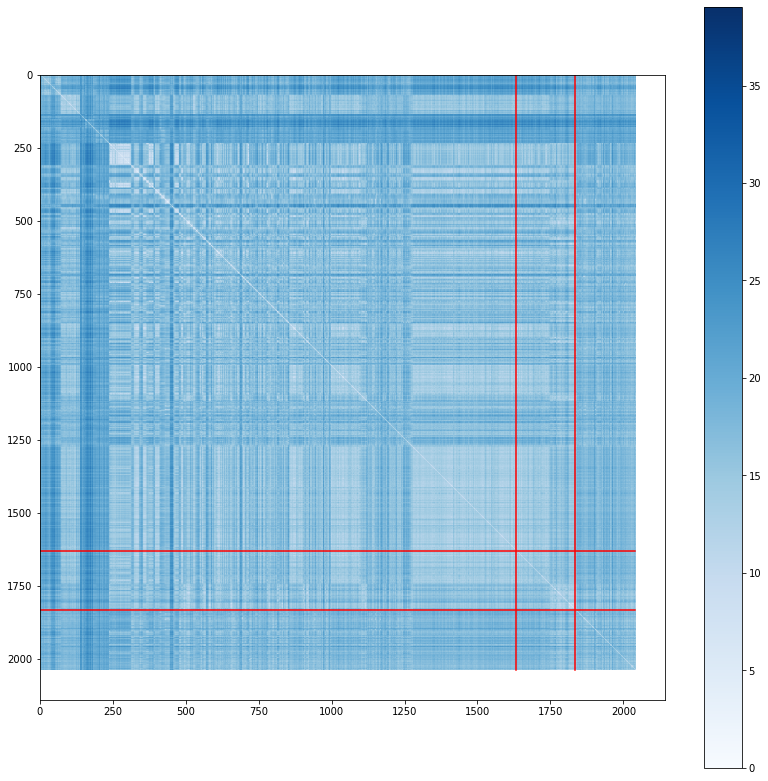

In [79]:
plt.figure(figsize=(14,14))
plt.imshow(X_pairwise, cmap='Blues');

# split
plt.plot([train_cnt, train_cnt], [0, cnt], color='red')
plt.plot([train_cnt+valid_cnt, train_cnt+valid_cnt], [0, cnt], color='red')
plt.plot([0, cnt], [train_cnt, train_cnt], color='red')
plt.plot([0, cnt], [train_cnt+valid_cnt, train_cnt+valid_cnt], color='red')



plt.colorbar();

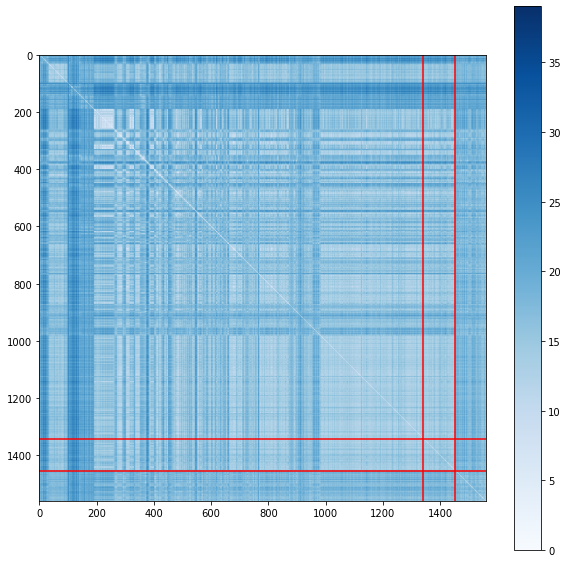

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(X_pairwise[~neg_mask][:, ~neg_mask], cmap='Blues');

# split
plt.plot([train_cnt_pos, train_cnt_pos], [0, cnt_pos], color='red')
plt.plot([train_cnt_pos+valid_cnt_pos, train_cnt_pos+valid_cnt_pos], [0, cnt_pos], color='red')
plt.plot([0, cnt_pos], [train_cnt_pos, train_cnt_pos], color='red')
plt.plot([0, cnt_pos], [train_cnt_pos+valid_cnt_pos, train_cnt_pos+valid_cnt_pos], color='red')
plt.xlim(0, cnt_pos)
plt.ylim(cnt_pos, 0)
plt.colorbar();

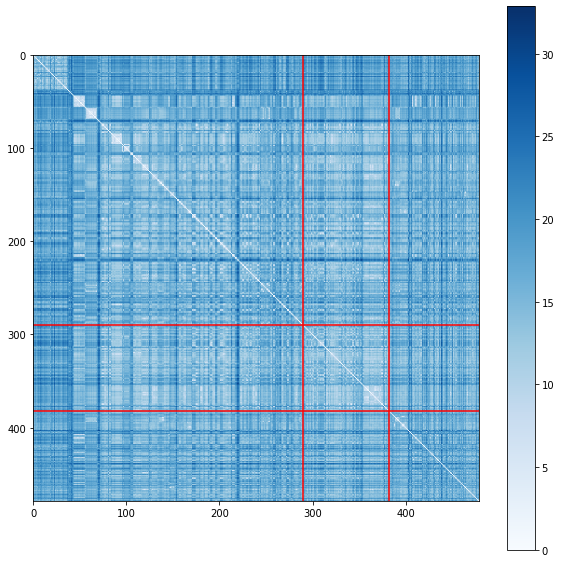

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(X_pairwise[neg_mask][:, neg_mask], cmap='Blues');

# split
plt.plot([train_cnt_neg, train_cnt_neg], [0, cnt_neg], color='red')
plt.plot([train_cnt_neg+valid_cnt_neg, train_cnt_neg+valid_cnt_neg], [0, cnt_neg], color='red')
plt.plot([0, cnt_neg], [train_cnt_neg, train_cnt_neg], color='red')
plt.plot([0, cnt_neg], [train_cnt_neg+valid_cnt_neg, train_cnt_neg+valid_cnt_neg], color='red')
plt.xlim(0, cnt_neg)
plt.ylim(cnt_neg, 0)
plt.colorbar();

In [82]:
X_pairwise[5,5]

0.0

In [83]:
correct = (df.y_pred > 0.5) == 1-df.target

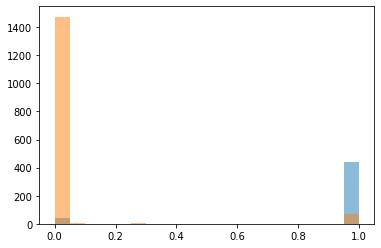

In [84]:
plt.figure()
plt.hist(df.y_pred[neg_mask], range=(0,1), bins=20, alpha=0.5);
plt.hist(df.y_pred[~neg_mask], range=(0,1), bins=20, alpha=0.5);

In [85]:
sum(df.y_pred > 0.2)

519

In [86]:
len(X_pairwise[~neg_mask][:,~neg_mask][100])

1560

In [87]:
split_colors = np.zeros(cnt)
split_colors[train_cnt:train_cnt+valid_cnt] = 1
split_colors[train_cnt+valid_cnt:] = 2

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


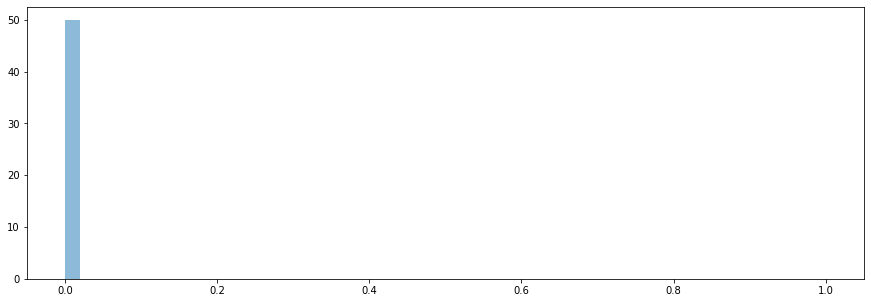

In [88]:
plt.figure(figsize=(15,5))

plt.hist(X_pairwise[100][correct], range=(0, 1), bins=50, alpha=0.5, density=True);
plt.hist(X_pairwise[100][~correct], range=(0, 1), bins=50, alpha=0.5, density=True);

In [89]:
X_pairwise[:,:train_cnt].min(axis=1)

array([ 0.       ,  0.       ,  0.       , ..., 10.59378  ,  3.8293276,
        8.521109 ], dtype=float32)

In [90]:
closest_from_train = X_pairwise[:,:train_cnt].min(axis=1)
closest_from_train = np.percentile(X_pairwise[:,:train_cnt], 1, axis=1)

In [91]:
closest_from_train.shape

(2039,)

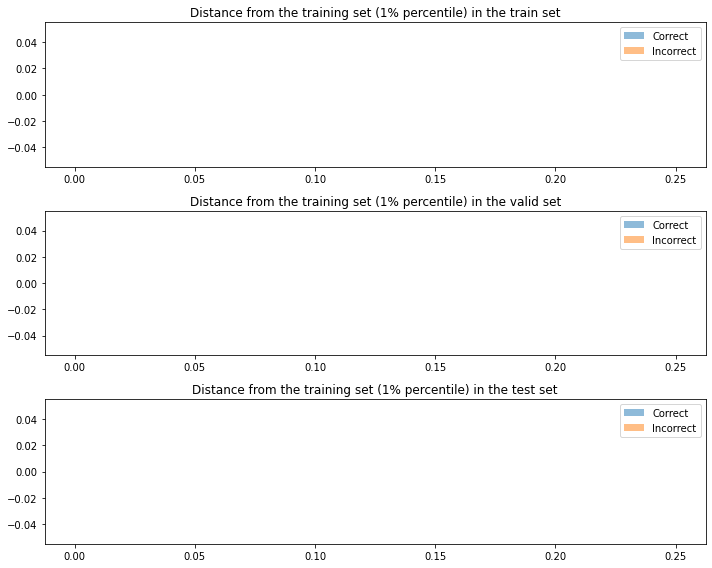

In [92]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))

for (i, split) in enumerate(['train', 'valid', 'test']):
    ax[i].hist(closest_from_train[correct & (split_colors==i)], range=(0, .25), bins=30, alpha=0.5);
    ax[i].hist(closest_from_train[~correct & (split_colors==i)], range=(0, .25), bins=30, alpha=0.5);
    ax[i].title.set_text(f"Distance from the training set (1% percentile) in the {split} set")
    ax[i].legend(["Correct", "Incorrect"]);
plt.tight_layout()

In [93]:
X.shape

(2039, 1024)

In [94]:
df_train = df[df["level_0"] == "train"]
df_valid = df[df["level_0"] == "valid"]
df_test = df[df["level_0"] == "test"]

In [95]:
np.sum((df["level_0"] == "train"))

1631

In [96]:
X_train = X[df["level_0"] == "train"]
y_train = X[df["target"] == "train"]

X_valid = X[df["level_0"] == "valid"]
X_test = X[df["level_0"] == "test"]

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)

In [98]:
X_train.shape, X_valid.shape, X_test.shape

((1631, 2), (204, 2), (204, 2))

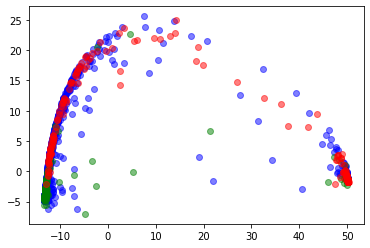

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], color="blue", alpha=0.5)
plt.scatter(X_valid[:,0], X_valid[:,1], color="green", alpha=0.5)
plt.scatter(X_test[:,0], X_test[:,1], color="red", alpha=0.5)
plt.plot();

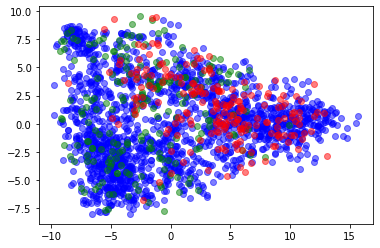

In [99]:
# Pretrained
plt.scatter(X_train[:,0], X_train[:,1], color="blue", alpha=0.5)
plt.scatter(X_valid[:,0], X_valid[:,1], color="green", alpha=0.5)
plt.scatter(X_test[:,0], X_test[:,1], color="red", alpha=0.5)
plt.plot();

In [100]:
X_train_0 = X[(df["level_0"] == "train") & (df['target'] == 0)]
X_valid_0 = X[(df["level_0"] == "valid") & (df['target'] == 0)]
X_test_0 = X[(df["level_0"] == "test") & (df['target'] == 0)]

X_train_1 = X[(df["level_0"] == "train" ) & ( df['target'] == 1)]
X_valid_1 = X[(df["level_0"] == "valid" ) & ( df['target'] == 1)]
X_test_1 = X[(df["level_0"] == "test" ) & ( df['target'] == 1)]

l = [X_train_0, X_valid_0, X_test_0, X_train_1, X_valid_1, X_test_1]

In [101]:
# X_train_0

In [102]:
pairwise_dist = []
for i in l:
    dist = []
    for j in l:
        dist.append(np.mean(pairwise_distances(i,j)))
    pairwise_dist.append(dist)

Text(0.5, 1.0, 'pretrained')

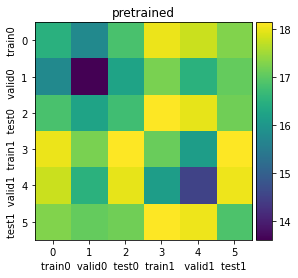

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots()

min_val, max_val = 0, 20

im1 = ax.imshow(pairwise_dist)
ax1_divider = make_axes_locatable(ax)
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cb1 = fig.colorbar(im1, cax=cax1)

xaxes = "train0  valid0  test0  train1   valid1  test1"
yaxes = "test1  valid1  train1  test0   valid0    train0"

ax.set_ylabel(yaxes)
ax.set_xlabel(xaxes)
ax.set_title("pretrained")
# ax.set_ylabel(axes)

# for i in range(6):
#     for j in range(6):
#         c = pairwise_dist[j,i]
#         ax.text(i, j, str(c), va='center', ha='center')

Text(0.5, 1.0, 'fine-tuned')

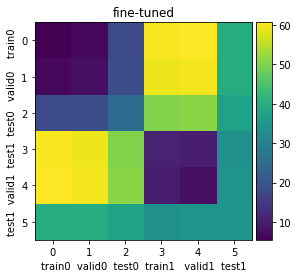

In [181]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots()

min_val, max_val = 0, 20

im1 = ax.imshow(pairwise_dist)
ax1_divider = make_axes_locatable(ax)
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cb1 = fig.colorbar(im1, cax=cax1)

xaxes = "train0  valid0  test0  train1   valid1  test1"
yaxes = "test1  valid1  test1  test0   valid0    train0"

ax.set_ylabel(yaxes)
ax.set_xlabel(xaxes)
ax.set_title("fine-tuned")
# ax.set_ylabel(axes)

# for i in range(6):
#     for j in range(6):
#         c = pairwise_dist[j,i]
#         ax.text(i, j, str(c), va='center', ha='center')

In [147]:
X_train.shape

(1631, 2)

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

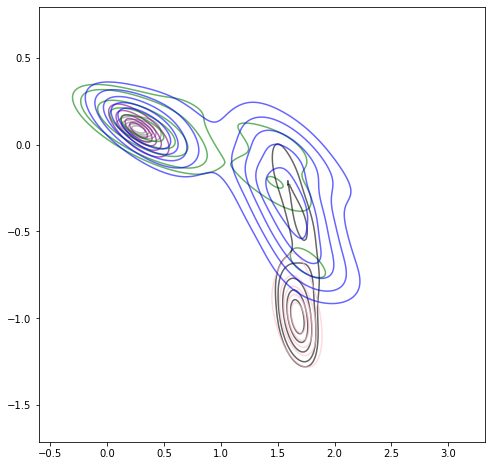

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(X_train_0[:, 0], X_train_0[:, 1], color="gray", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_0[:, 0], X_valid_0[:, 1], color="purple", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_0[:, 0], X_test_0[:, 1], color="green", alpha=0.6, thresh=.2, levels=6)

ax = sns.kdeplot(X_train_1[:, 0], X_train_1[:, 1], color="black", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_1[:, 0], X_valid_1[:, 1], color="pink", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_1[:, 0], X_test_1[:, 1], color="blue", alpha=0.6, thresh=.2, levels=6)

plt.show()

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

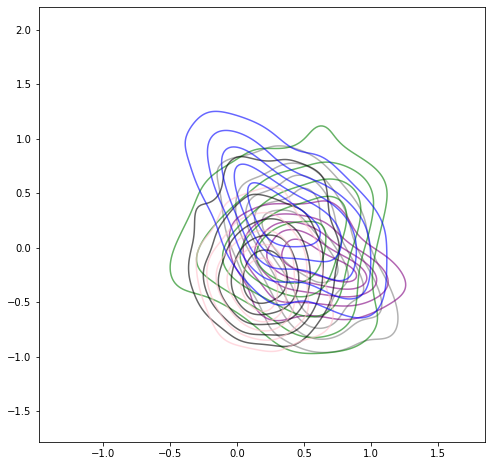

In [104]:
import seaborn as sns
# Pretrained
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(X_train_0[:, 0], X_train_0[:, 1], color="gray", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_0[:, 0], X_valid_0[:, 1], color="purple", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_0[:, 0], X_test_0[:, 1], color="green", alpha=0.6, thresh=.2, levels=6)

ax = sns.kdeplot(X_train_1[:, 0], X_train_1[:, 1], color="black", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_1[:, 0], X_valid_1[:, 1], color="pink", alpha=0.6, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_1[:, 0], X_test_1[:, 1], color="blue", alpha=0.6, thresh=.2, levels=6)

plt.show()

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

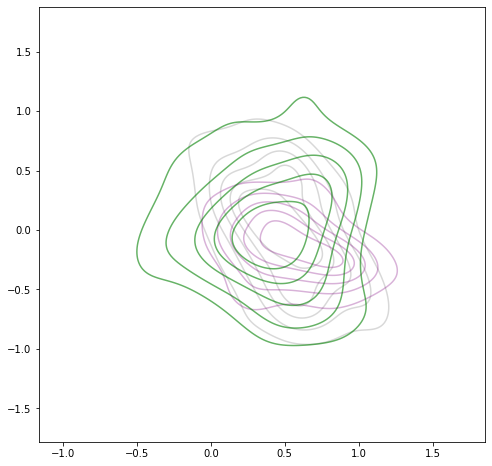

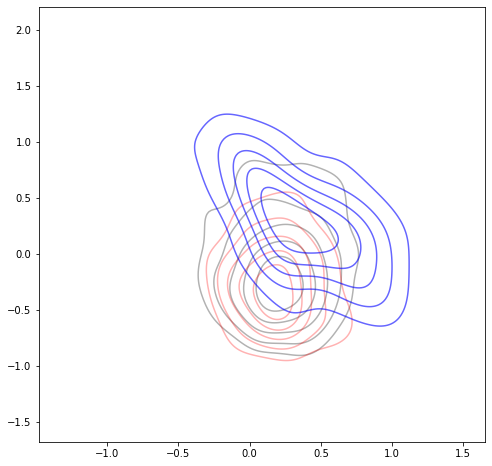

In [106]:
import seaborn as sns
# Pretrained
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(X_train_0[:, 0], X_train_0[:, 1], color="grey", alpha=0.3, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_0[:, 0], X_valid_0[:, 1], color="purple", alpha=0.3, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_0[:, 0], X_test_0[:, 1], color="green", alpha=0.6, thresh=.2, levels=6)

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(X_train_1[:, 0], X_train_1[:, 1], color="black", alpha=0.3, thresh=.2, levels=6)
ax = sns.kdeplot(X_valid_1[:, 0], X_valid_1[:, 1], color="red", alpha=0.3, thresh=.2, levels=6)
ax = sns.kdeplot(X_test_1[:, 0], X_test_1[:, 1], color="blue", alpha=0.6, thresh=.2, levels=6)

plt.show()

In [107]:

# sns.kdeplot(X_train_1[:, 0], X_train_1[:, 1], color="orange", alpha=0.3)
# sns.kdeplot(X_valid_1[:, 0], X_valid_1[:, 1], color="red", alpha=0.3)
# sns.kdeplot(X_test_1[:, 0], X_test_1[:, 1], color="blue", alpha=0.6)
# plt.plot()

In [ ]:
from sklearn.neighbors import KernelDensity

In [61]:
dist_train_0 = pairwise_distances(X_train_0, X_train_0)
dist_valid_0 = pairwise_distances(X_valid_0, X_valid_0)
dist_test_0 = pairwise_distances(X_test_0, X_test_0)

dist_train_1 = pairwise_distances(X_train_1, X_train_1)
dist_valid_1 = pairwise_distances(X_valid_1, X_valid_1)
dist_test_1 = pairwise_distances(X_test_1, X_test_1)


dist_train_test_0 = pairwise_distances(X_train_0, X_test_0)
dist_train_valid_0 = pairwise_distances(X_train_0, X_valid_0)
dist_valid_test_0 = pairwise_distances(X_valid_0, X_test_0)
dist_train_test_1 = pairwise_distances(X_train_1, X_test_1)
dist_train_valid_1 = pairwise_distances(X_train_1, X_valid_1)
dist_valid_test_1 = pairwise_distances(X_valid_1, X_test_1)


In [53]:
dist_train_test_0

array([[16.188444 , 18.138546 , 21.506783 , ..., 20.601572 , 16.897327 ,
        17.21036  ],
       [13.869327 , 14.579614 , 17.414238 , ..., 19.303421 , 13.220327 ,
        13.894979 ],
       [13.949545 , 14.635925 , 18.569872 , ..., 20.832253 , 15.040341 ,
        16.695063 ],
       ...,
       [17.254671 , 14.708506 , 17.130587 , ..., 20.879757 , 15.0218525,
        18.081812 ],
       [15.602868 , 14.209295 , 14.44756  , ..., 20.87376  , 13.985834 ,
        17.745998 ],
       [11.721338 , 14.35218  , 11.324547 , ..., 20.83177  , 13.578492 ,
        17.265604 ]], dtype=float32)

In [54]:
np.mean(dist_train_test_0), np.mean(dist_train_valid_0), np.mean(dist_valid_test_0)

(16.840555, 15.762423, 16.23539)

In [55]:
np.mean(dist_train_test_1), np.mean(dist_train_valid_1), np.mean(dist_valid_test_1)

(18.127796, 16.127928, 18.019783)

In [56]:
dist_train_1_test_0 = pairwise_distances(X_train_1, X_test_0)
dist_train_1_valid_0 = pairwise_distances(X_train_1, X_valid_0)
dist_valid_1_test_0 = pairwise_distances(X_valid_1, X_test_0)
dist_train_0_test_1 = pairwise_distances(X_train_0, X_test_1)
dist_train_0_valid_1 = pairwise_distances(X_train_0, X_valid_1)
dist_valid_0_test_1 = pairwise_distances(X_valid_0, X_test_1)

In [57]:
np.mean(dist_train_1_test_0), np.mean(dist_train_1_valid_0), np.mean(dist_valid_1_test_0)

(18.135391, 17.218605, 17.965008)

In [58]:
np.mean(dist_train_0_test_1), np.mean(dist_train_0_valid_1), np.mean(dist_valid_0_test_1)

(17.274988, 17.77017, 17.07251)

In [59]:
np.mean(dist_train_test_0), np.mean(dist_train_valid_0), np.mean(dist_valid_test_0)

(16.840555, 15.762423, 16.23539)

In [60]:
np.mean(dist_train_test_1), np.mean(dist_train_valid_1), np.mean(dist_valid_test_1)

(18.127796, 16.127928, 18.019783)

In [61]:
np.mean(dist_train_0), np.mean(dist_valid_0), np.mean(dist_test_0)

(16.48488, 13.606562, 16.754936)